<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Kolmogorov_Smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:purple;">PRUEBA DE KOLMOGOROV-SMIRNOV </span>
<span style="color:purple;"></span>

En esta prueba ordenamos la muestra $X_m$ , de menor a mayor y comparamos la frecuencia observada contra la frecuencia esperada; es decir comparamos contra la Distribución Acumulativa $F(x)$

In [45]:
import numpy as np  #Calculo simbolico
from scipy.stats import kstest, ksone
import pandas as pd #Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL
from tabulate import tabulate #Esta libreria sirve para crear tablas

Dada una muestra $X_n$ de prueba.

Establecemos:
$$H_0:X_n ∼ U(0,1)$$

$$
H_1:X_n \nsim U(0,1)
$$

<span style="color:magenta;">**Paso 1:**</span> Ordenamos los numeros de la muestraen orden ascendente

In [46]:
datos = sorted([ #Datos de la tabla 3.1 de los numeros pseudoaleatorios
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]) #sorted devuelve Datos ordenados


In [47]:
datos_ordenados = np.sort(datos) #Esta es optra forma de ordenar los datos
n = len(datos)
alpha = 0.5
# Función de distribución uniforme teórica F0(x) = x para U(0,1)
F0 = datos_ordenados

Función de distribución empírica $Fn(x)$

In [48]:
# Para cada punto, Fn(x) = i/n, donde i es la posición
indices = np.arange(1, n + 1)
Fn_antes = (indices - 1) / n  # Fn justo antes del punto
Fn_despues = indices / n      # Fn en el punto

<span style="color:purple;">**Paso 2:**</span> Calculamos el estadístico de prueba D a partir de:

Estadístico $D_n^+$ (máxima desviación por arriba)
$$
D_n^+ = \max_{1 \leq i \leq n} \left\{ \frac{i}{n} - F_0(x_{(i)}) \right\}
$$

Estadístico $D_n^-$ (máxima desviación por debajo)

$$
D_n^- = \max_{1 \leq i \leq n} \left\{ F_0(x_{(i)}) - \frac{i-1}{n} \right\}
$$

Estadístico $D_n$ (bilateral)

$$
D_n = \max(D_n^+, D_n^-)
$$

O en términos de datos ordenados:

$$
D_n = \max_{1 \leq i \leq n} \left\{ \max\left( \left| \frac{i}{n} - F_0(x_{(i)}) \right|, \left| F_0(x_{(i)}) - \frac{i-1}{n} \right| \right) \right\}
$$

Donde $i$ es la posición de $x_i$


In [49]:
# Calcular D+ y D-
D_plus = Fn_despues - F0
D_minus = F0 - Fn_antes

In [50]:
#valores críticos
D_plus_max_idx = np.argmax(D_plus) #estas son las formulas descritas arriba
D_minus_max_idx = np.argmax(D_minus)
D_plus_max_valor = D_plus[D_plus_max_idx]
D_minus_max_valor = D_minus[D_minus_max_idx]
D_max = max(D_plus_max_valor, D_minus_max_valor)

In [51]:
# Crear tabla de resultados
tabla = pd.DataFrame({
    'i': indices,
    'x(i)': datos_ordenados,
    'F0(x)': F0,
    'i/n': Fn_despues,
    '(i-1)/n': Fn_antes,
    'D+ = i/n - F0(x)': D_plus,
    'D- = F0(x) - (i-1)/n': D_minus
})


Este paso lo podemos omitir pero nos sirve para tener una tabla y formatos mas limpios

In [53]:
# Formatear para mostrar
tabla_limpia= tabla.copy()
for col in ['x(i)', 'F0(x)', 'i/n', '(i-1)/n', 'D+ = i/n - F0(x)', 'D- = F0(x) - (i-1)/n']:
    tabla_limpia[col] = tabla_limpia[col].apply(lambda x: f'{x:.4f}')

Creamos la tabla

In [54]:
# Mostrar tabla
print("\n" + "="*100)
print("TABLA DE CÁLCULO KOLMOGOROV-SMIRNOV")
print("="*100)
print(tabulate(tabla_limpia, headers='keys', tablefmt='fancy_grid', showindex=False))

# Prueba de Kolmogorov-Smirnov con scipy
statistic, p_value = kstest(datos, 'uniform')

# Valor crítico para α=0.05 (aproximación para n grande)
alpha = 0.05
D_critico = 1.36 / np.sqrt(n)  # Aproximación para n>50


TABLA DE CÁLCULO KOLMOGOROV-SMIRNOV
╒═════╤════════╤═════════╤═══════╤═══════════╤════════════════════╤════════════════════════╕
│   i │   x(i) │   F0(x) │   i/n │   (i-1)/n │   D+ = i/n - F0(x) │   D- = F0(x) - (i-1)/n │
╞═════╪════════╪═════════╪═══════╪═══════════╪════════════════════╪════════════════════════╡
│   1 │ 0.0012 │  0.0012 │  0.01 │      0    │             0.0088 │                 0.0012 │
├─────┼────────┼─────────┼───────┼───────────┼────────────────────┼────────────────────────┤
│   2 │ 0.0319 │  0.0319 │  0.02 │      0.01 │            -0.0119 │                 0.0219 │
├─────┼────────┼─────────┼───────┼───────────┼────────────────────┼────────────────────────┤
│   3 │ 0.0327 │  0.0327 │  0.03 │      0.02 │            -0.0027 │                 0.0127 │
├─────┼────────┼─────────┼───────┼───────────┼────────────────────┼────────────────────────┤
│   4 │ 0.0501 │  0.0501 │  0.04 │      0.03 │            -0.0101 │                 0.0201 │
├─────┼────────┼─────────┼───────

Grafica de la prueba de Kolmogorov Smirnov

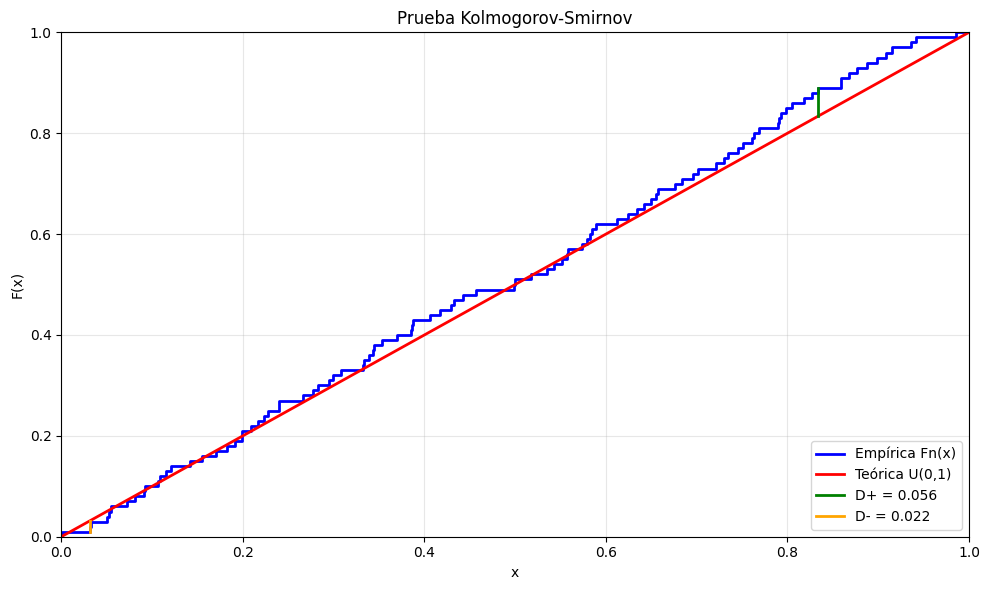

In [55]:
# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Función de distribución empírica
x_empirica = np.concatenate(([0], np.sort(datos), [1]))
y_empirica = np.concatenate(([0], np.arange(1, len(datos)+1)/len(datos), [1]))

# Graficar
ax.step(x_empirica, y_empirica, 'b-', linewidth=2, where='post', label='Empírica Fn(x)')
ax.plot([0, 1], [0, 1], 'r-', linewidth=2, label='Teórica U(0,1)')

# D+ máximo
ax.plot([x_empirica[D_plus_max_idx+1], x_empirica[D_plus_max_idx+1]],
        [x_empirica[D_plus_max_idx+1], y_empirica[D_plus_max_idx+1]],
        'g-', linewidth=2, label=f'D+ = {D_plus_max_valor:.3f}')

# D- máximo
ax.plot([x_empirica[D_minus_max_idx+1], x_empirica[D_minus_max_idx+1]],
        [y_empirica[D_minus_max_idx], x_empirica[D_minus_max_idx+1]],
        'orange', linewidth=2, label=f'D- = {D_minus_max_valor:.3f}')

ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Prueba Kolmogorov-Smirnov')
ax.legend(loc='lower right')
ax.grid(alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

Paso 3. Comparar con el valor crítico $d_{α}n$

si $D<d_{α}n$ se rechaza

In [56]:
# Mostrar resultados
print("\n" + "="*100)
print("RESULTADOS DE LA PRUEBA KOLMOGOROV-SMIRNOV")
print("="*100)
print(f"D crítico (α=0.05): {D_critico:.5f}")
print(f"Estadístico KS (scipy): {statistic:.5f}")
print(f"Valor p: {p_value:.5f}")
print(f"\nD+ máximo = {D_plus_max_valor:.5f} (en x = {datos_ordenados[D_plus_max_idx]:.5f})")
print(f"D- máximo = {D_minus_max_valor:.5f} (en x = {datos_ordenados[D_minus_max_idx]:.5f})")
print(f"D = max(D+, D-) = {D_max:.5f}")
#Prueba de hipotesis
if D_max > D_critico:
    print("\033[91m Rechazamos la hipótesis nula: Los datos no siguen una distribución uniforme.\033[0m")
    print(f"   D = {D_max:.5f} > D_crítico = {D_critico:.5f}")
else:
    print("\033[92m No se puede rechazar la hipótesis nula: Los datos podrían seguir una distribución uniforme.\033[0m")
    print(f"   D = {D_max:.5f} ≤ D_crítico = {D_critico:.5f}")


RESULTADOS DE LA PRUEBA KOLMOGOROV-SMIRNOV
D crítico (α=0.05): 0.13600
Estadístico KS (scipy): 0.05642
Valor p: 0.88987

D+ máximo = 0.05642 (en x = 0.83358)
D- máximo = 0.02185 (en x = 0.03185)
D = max(D+, D-) = 0.05642
 No se puede rechazar la hipótesis nula: Los datos podrían seguir una distribución uniforme.
   D = 0.05642 ≤ D_crítico = 0.13600


<span style="color:purple;">**Conclusión:**</span>
* El conjunto de datos PASÓ las pruebas de uniformidad
* Comportamiento aceptable para simulación y modelado
* Las desviaciones observadas están dentro de lo esperado por azar

Esta conclusión es válida para un nivel de significancia α = 0.05, que es el estándar en la mayoría de aplicaciones estadísticas.